In [1]:
import pandas as pd  # Para la manipulación de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para la visualización de gráficos
import seaborn as seabornInstance  # Para gráficos estadísticos
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.model_selection import RepeatedKFold, GridSearchCV  # Para la optimización del modelo
from sklearn import metrics  # Para la evaluación del modelo

# Configuración para mostrar gráficos en línea
%matplotlib inline

In [2]:
# Cargar el archivo CSV en un DataFrame
datos = pd.read_csv("C:/Users/david/segundaEvaluacion/Conjunto de Datos/beisbol.csv", sep=',')

In [3]:
# Mostrar los primeros registros
datos.head()

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [4]:
# Resumen estadístico del conjunto de datos
datos.describe()

,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


In [5]:
# Verificar la estructura del DataFrame
datos.shape

(30, 4)

In [6]:
# Seleccionar la variable independiente 'bateos'
X = datos[['bateos']]
# Seleccionar la variable dependiente 'runs'
y = datos['runs']

In [7]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [9]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Obtener el intercepto y la pendiente del modelo
print("Intercepto:", model.intercept_)
print("Pendiente:", model.coef_)

Intercepto: -2981.517212576021
Pendiente: [0.66685087]


In [11]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Crear un DataFrame para comparar los valores reales y predichos
datos2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(datos2)

    Actual   Predicted
27     570  676.826633
15     713  738.843764
23     645  654.153704
17     704  692.164203
8      735  715.503983
9      615  751.513930


In [12]:
# Calcular el error absoluto medio, error cuadrático medio y la raíz del error cuadrático medio
print('Error Absoluto Medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 51.61164068147824
Error Cuadrático Medio: 5219.975632116472
Raíz del Error Cuadrático Medio: 72.24939883567525


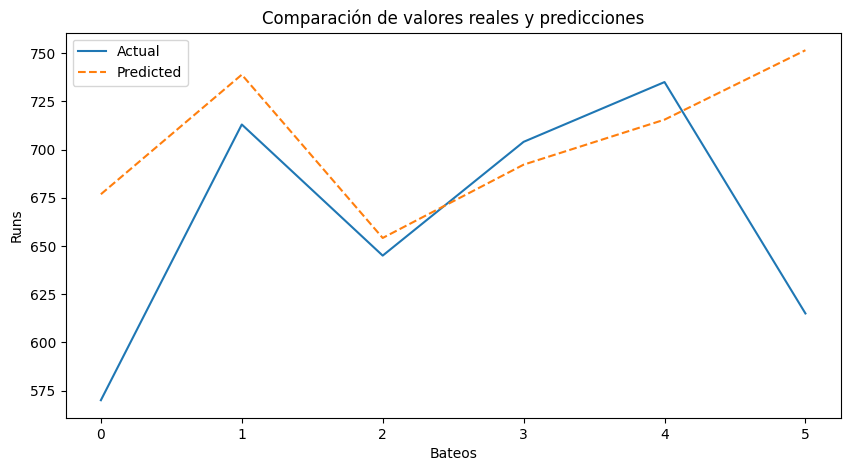

In [13]:
# Visualización de los resultados
plt.figure(figsize=(10,5))
plt.plot(datos2['Actual'].values, label='Actual')
plt.plot(datos2['Predicted'].values, label='Predicted', linestyle='--')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.title('Comparación de valores reales y predicciones')
plt.show()

In [14]:
# Definir la validación cruzada
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [15]:
# Definir el espacio de búsqueda de hiperparámetros 
space = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [16]:
# Búsqueda de hiperparámetros óptimos utilizando GridSearchCV
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(X, y)

In [17]:
# Mostrar los mejores hiperparámetros y puntuación
print('Mejor puntuación:', result.best_score_)
print('Mejores hiperparámetros:', result.best_params_)

Mejor puntuación: -54.90077212237434
Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [18]:
# Crear un modelo con los mejores hiperparámetros
model_optimized = LinearRegression(**result.best_params_)

# Entrenar el modelo optimizado
model_optimized.fit(X_train, y_train)

# Predecir con el modelo optimizado
y_pred_optimized = model_optimized.predict(X_test)

# Comparar los resultados optimizados
datos2_optimized = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized})
print(datos2_optimized.head())

    Actual   Predicted
27     570  676.826633
15     713  738.843764
23     645  654.153704
17     704  692.164203
8      735  715.503983


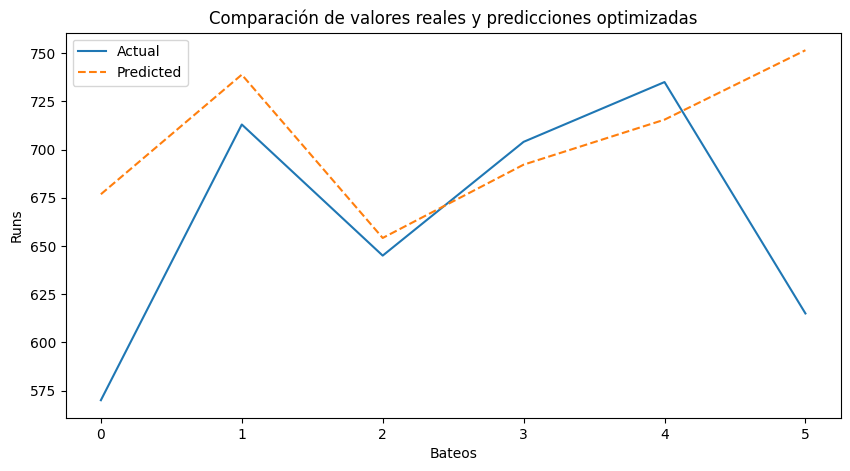

In [19]:
# Visualización de los resultados optimizados
plt.figure(figsize=(10,5))
plt.plot(datos2_optimized['Actual'].values, label='Actual')
plt.plot(datos2_optimized['Predicted'].values, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.title('Comparación de valores reales y predicciones optimizadas')
plt.show()